In [1]:
import sys 
sys.path.append('../')

from src.utils.counting_utils import * 
from src.utils.plotting_utils import * 

output_file_tbal = "../outputs/circles_linear_calib_eval_full_tbal_eval_full/circles_linear_calib_eval_full_tbal_eval_full__04-03-2024__00-51-26.xlsx"

df_tbal = pd.read_excel(output_file_tbal)
df_tbal = df_tbal.drop(columns=['Unnamed: 0'])
# Change all calib_conf with NaN to "None"
#df['calib_conf'] = df['calib_conf'].fillna("None")

In [2]:
import matplotlib
 
matplotlib.rcParams.update({'font.size': 12})

In [3]:
output_file_al_st  = "../outputs/circles_linear_calib_eval_full_al_st_eval_full/circles_linear_calib_eval_full_al_st_eval_full__04-02-2024__23-08-39.xlsx"
df_al_st = pd.read_excel(output_file_al_st)

In [4]:
output_file_al_st_all = "../outputs/circles_linear_calib_eval_full_all_al_st_all_eval_full/circles_linear_calib_eval_full_all_al_st_all_eval_full__04-03-2024__02-34-01.xlsx"

df_al_st_all = pd.read_excel(output_file_al_st_all) 
#df_al_st_all = df_tbal.drop(columns=['Unnamed: 0'])

In [5]:
df_al_st_all

,Unnamed: 0,calib_conf,training_conf,C_1,N_t,N_v,N_hyp_v,Auto-Labeling-Err-Mean,Coverage-Mean,Avg-ECE-Val-Mean,...,eps,learning_rate,max_epochs,method,momentum,num_runs,optimizer,query_batch_frac,seed_frac,weight_decay
0,0,NaN,std_cross_entropy,0.25,1000,2000,50,50.0229,87.5,NaN,...,0.01,0.01,20,al_st_all,0.9,5,sgd,0.01,0.05,0.0001
1,1,NaN,std_cross_entropy,0.25,200,2000,50,50.0615,97.5,NaN,...,0.01,0.01,20,al_st_all,0.9,5,sgd,0.01,0.05,0.0001
2,2,NaN,std_cross_entropy,0.25,400,2000,50,50.0737,95.0,NaN,...,0.01,0.01,20,al_st_all,0.9,5,sgd,0.01,0.05,0.0001
3,3,NaN,std_cross_entropy,0.25,600,2000,50,50.1081,92.5,NaN,...,0.01,0.01,20,al_st_all,0.9,5,sgd,0.01,0.05,0.0001
4,4,NaN,std_cross_entropy,0.25,800,2000,50,50.1083,90.0,NaN,...,0.01,0.01,20,al_st_all,0.9,5,sgd,0.01,0.05,0.0001


In [6]:
df_tbal_2 =  df_tbal[['N_t','Auto-Labeling-Err-Mean','Auto-Labeling-Err-Std','Coverage-Mean','Coverage-Std']].sort_values(by=['N_t'])

In [7]:
df_al_st_2 = df_al_st[['N_t','Auto-Labeling-Err-Mean','Auto-Labeling-Err-Std','Coverage-Mean','Coverage-Std']].sort_values(by=['N_t'])

In [8]:
df_al_st_all_2 = df_al_st_all[['N_t','Auto-Labeling-Err-Mean','Auto-Labeling-Err-Std','Coverage-Mean','Coverage-Std']].sort_values(by=['N_t'])

Text(0.5, 0, 'Max Training Points ($N_t$)')

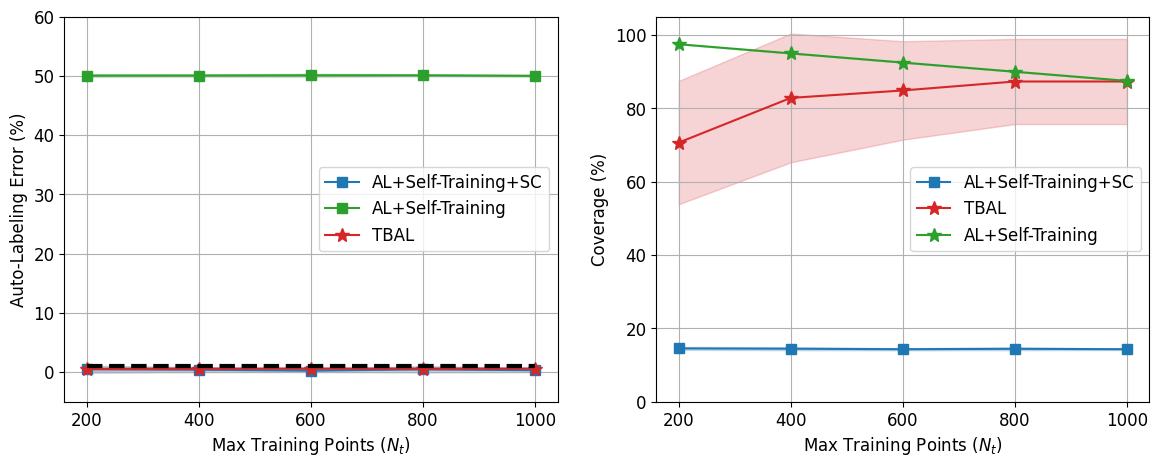

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(14,5))



df_1 = df_al_st_2
df_2 = df_tbal_2 
df_3 = df_al_st_all_2

err1, e_std1 = df_1['Auto-Labeling-Err-Mean'], df_1['Auto-Labeling-Err-Std']

err2, e_std2 = df_2['Auto-Labeling-Err-Mean'], df_2['Auto-Labeling-Err-Std']

err3, e_std3 = df_3['Auto-Labeling-Err-Mean'], df_3['Auto-Labeling-Err-Std']



l1, = ax[0].plot(df_1['N_t'], err1, marker='s', markersize=7,color='tab:blue', label='AL+Self-Training+SC')
ax[0].fill_between(df_1['N_t'], err1-e_std1, err1+e_std1, alpha=0.2, color='tab:blue' )

l2, = ax[0].plot(df_3['N_t'], err3, marker='s', markersize=7,color='tab:green', label='AL+Self-Training')
ax[0].fill_between(df_3['N_t'], err3-e_std3, err3+e_std3, alpha=0.2, color='tab:green' )

ax[0].set_ylim(0,5)
ax[0].grid()
ax[0].set_xticks(df_1['N_t'])


l3,=ax[0].plot(df_2['N_t'], err2, marker='*', markersize=10,color='tab:red', label='TBAL')
ax[0].fill_between(df_2['N_t'], err2-e_std2, err2+e_std2, alpha=0.2, color='tab:red' )
ax[0].set_ylim(-5,60)
ax[0].set_xticks(df_2['N_t'])

ax[0].legend()
ax[0].set_ylabel('Auto-Labeling Error (%)')
ax[0].set_xlabel('Max Training Points ($N_t$)') 



cov2, c_std2 = df_2['Coverage-Mean'], df_2['Coverage-Std']

cov1, c_std1 = df_1['Coverage-Mean'], df_1['Coverage-Std']

cov3, c_std3 = df_3['Coverage-Mean'], df_3['Coverage-Std']


ax[1].plot(df_1['N_t'], cov1, marker='s', markersize=7,color='tab:blue', label='AL+Self-Training+SC' )
ax[1].fill_between(df_1['N_t'], cov1-c_std1, cov1+c_std1,alpha=0.2, color='tab:blue')
ax[1].set_ylim(0,100)
ax[1].grid()


ax[1].plot(df_2['N_t'], cov2, marker='*', markersize=10,color='tab:red', label='TBAL' )
ax[1].fill_between(df_2['N_t'], cov2-c_std2, cov2+c_std2,alpha=0.2, color='tab:red')
ax[1].set_ylim(0,105)
ax[1].set_xticks(df_2['N_t'])

ax[1].plot(df_2['N_t'], cov3, marker='*', markersize=10,color='tab:green', label='AL+Self-Training' )
ax[1].fill_between(df_2['N_t'], cov3-c_std3, cov3+c_std3,alpha=0.2, color='tab:green')
ax[1].set_ylim(0,105)
ax[1].set_xticks(df_2['N_t'])




ax[1].legend(loc='center right')
ax[1].set_ylabel('Coverage (%)')
ax[1].set_xlabel('Max Training Points ($N_t$)')


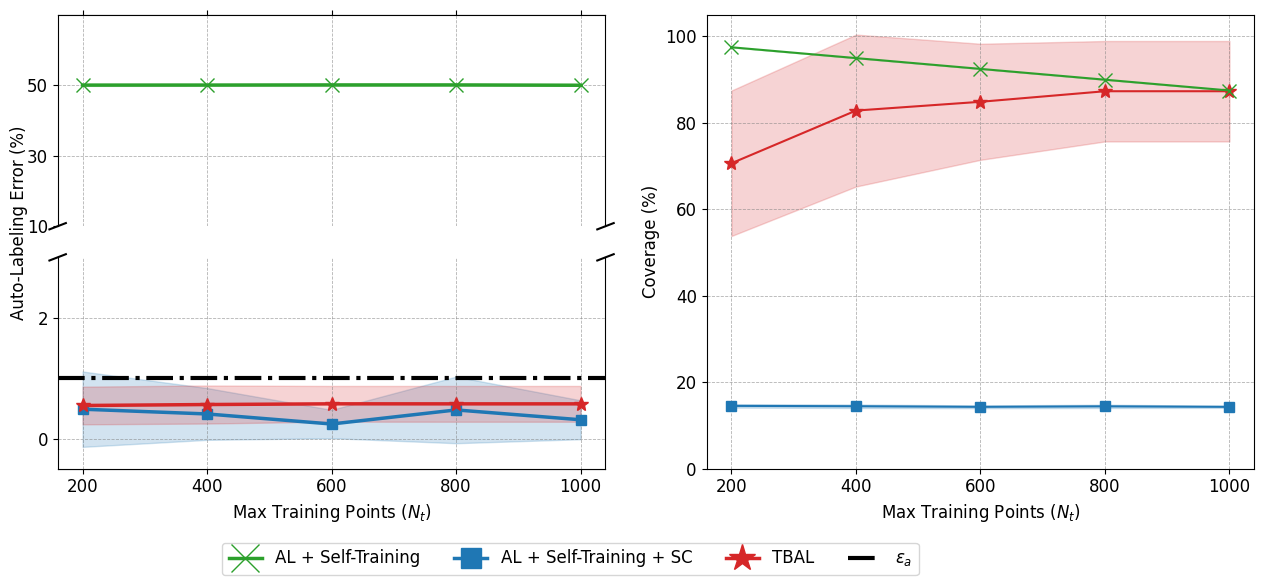

In [50]:
import matplotlib.pyplot as plt
import numpy as np


lst_n_q = df_2['N_t'] 

c_tbal = 'tab:red'

import matplotlib.gridspec as gridspec
eps = 1 

def gen_plot_1_with_broken_axis(fig,ax_top,ax_bottom):

    def plot(ax1,ax2,x,mu,std,label,marker,color,linestyle='solid',markevery=1,alpha=1.0,markersize=7):
        l1,=ax1.plot(x,mu,marker=marker,label=label,color=color,linestyle=linestyle,
        markevery=markevery,linewidth=2.5,markersize=markersize,alpha=alpha)
        ax1.fill_between(x,mu-std,mu+std,alpha=0.2,color=color)

        l1,=ax2.plot(x,mu,marker=marker,label=label,color=color,linestyle=linestyle,
        markevery=markevery,linewidth=2.5,markersize=markersize,alpha=alpha)
        ax2.fill_between(x,mu-std,mu+std,alpha=0.2,color=color)

        return l1
    
    
    l1=plot(ax_top,ax_bottom,lst_n_q,err3, e_std3,'AL+Self-Training','x',color='tab:green', markersize=10) 
    l2=plot(ax_top,ax_bottom,lst_n_q,err1, e_std1,'AL+Self-Training+SC','s',color='tab:blue', markersize=7) 
    l3=plot(ax_top,ax_bottom,lst_n_q,err2, e_std2,'TBAL',marker='*',color='tab:red', markersize=10)
    

    l4 = ax_bottom.axhline(eps,color='black',
                            linestyle='dashdot',linewidth=3.0,label='Error Threshold $\epsilon_a$')
    ax_bottom.set_xlabel('Max Training Points ($N_t$)')
    

    # zoom-in / limit the view to different portions of the data
    bottom_high = 3
    top_low = 10
    y_up_err = 70 
    
    ax_top.set_ylim(top_low, y_up_err)  # outliers only
    ax_bottom.set_ylim(-0.5, 3)  # most of the data

    # hide the spines between ax and ax2
    ax_top.spines['bottom'].set_visible(False)
    ax_bottom.spines['top'].set_visible(False)
    ax_top.xaxis.tick_top()
    ax_top.tick_params(labeltop=False)  # don't put tick labels at the top
    ax_bottom.xaxis.tick_bottom()

    #ax1.set_ylim(y_low_err,y_up_err)
 
    ax_top.set_yticks(np.arange(top_low,y_up_err,20),minor=True)
    ax_top.set_yticks(np.arange(top_low,y_up_err,20))

    ax_bottom.set_yticks(np.arange(0,bottom_high,2),minor=True)
    ax_bottom.set_yticks(np.arange(0,bottom_high,2))

    ax_bottom.set_xticks(lst_n_q)
    

    ax_top.set_xticks(lst_n_q)

    ax_bottom.set_xticklabels(ax_bottom.get_xticks())
    #ax1.yaxis.set_major_formatter(OOMFormatter(5, "%1.1f"))
    
    #ax1.ticklabel_format(axis='x',style='scientific',scilimits=(0,2000))

    #ax_bottom.set_ylabel('Auto-Labeling Error (%)')
    #ax_bottom.yaxis.set_label_coords(0.05, 0.6, transform=fig.transFigure)


    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
    ax_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax_bottom.transAxes)  # switch to the bottom axes
    ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    
    return [l1,l2,l3,l4]


def plot(save_path,cov=1):
    #fig,ax = plt.subplots(1,2,figsize=(12,5.5))

    fig = plt.figure(tight_layout=True,figsize=(12,5.5))
    gs = gridspec.GridSpec(2, 2)
    


    ax_right = fig.add_subplot(gs[:, 1])
    ax_left = fig.add_subplot(gs[:,0]) 
    ax_left.set_ylabel('Auto-Labeling Error (%)')
    #ax_left.axis('off')
    #ax.axis('off')
    ax_left.set_xticks([])
    ax_left.set_yticks([])
    ax_left.spines['left'].set_visible(False)
    ax_left.spines['right'].set_visible(False)
    ax_left.yaxis.set_label_coords(0.078, 0.58, transform=fig.transFigure)

    #ax_right.yaxis.set_label_coords(0.555, 0.90, transform=fig.transFigure)

    
    ax_top = fig.add_subplot(gs[0, 0])
    ax_bottom = fig.add_subplot(gs[1, 0])


    L =gen_plot_1_with_broken_axis(fig,ax_top,ax_bottom)
    
    #M = gen_plot2(ax_right)



    cov2, c_std2 = df_2['Coverage-Mean'], df_2['Coverage-Std']

    cov1, c_std1 = df_1['Coverage-Mean'], df_1['Coverage-Std']

    cov3, c_std3 = df_3['Coverage-Mean'], df_3['Coverage-Std']


    ax_right.plot(df_1['N_t'], cov1, marker='s', markersize=7,color='tab:blue', label='AL+Self-Training+SC' )
    ax_right.fill_between(df_1['N_t'], cov1-c_std1, cov1+c_std1,alpha=0.2, color='tab:blue')
    ax_right.set_ylim(0,100)
    ax_right.grid()


    ax_right.plot(df_2['N_t'], cov2, marker='*', markersize=10,color='tab:red', label='TBAL' )
    ax_right.fill_between(df_2['N_t'], cov2-c_std2, cov2+c_std2,alpha=0.2, color='tab:red')
    ax_right.set_ylim(0,105)
    ax_right.set_xticks(df_2['N_t'])

    ax_right.plot(df_2['N_t'], cov3, marker='x', markersize=10,color='tab:green', label='AL+Self-Training' )
    ax_right.fill_between(df_2['N_t'], cov3-c_std3, cov3+c_std3,alpha=0.2, color='tab:green')
    ax_right.set_ylim(0,105)
    ax_right.set_xticks(df_2['N_t'])




    #ax_right.legend(loc='center right')
    ax_right.set_ylabel('Coverage (%)')
    ax_right.set_xlabel('Max Training Points ($N_t$)')

    fig.subplots_adjust(hspace=1) 

    legendEntries = ['AL + Self-Training','AL + Self-Training + SC', 'TBAL', '$\epsilon_a$']
    ax_top.grid(color='gray', alpha=0.6, linestyle='dashed', linewidth=0.6,which='both')
    ax_bottom.grid(color='gray', alpha=0.6, linestyle='dashed', linewidth=0.6,which='both')
    ax_right.grid(color='gray', alpha=0.6, linestyle='dashed', linewidth=0.6,which='both')


    lgd=fig.legend(L,legendEntries,ncol=6,loc="lower center",bbox_to_anchor=(0.53, -0.06),
                borderaxespad=0, frameon=True, markerscale=2)

    visualize = True 
    plt.tight_layout()
    plt.subplots_adjust(right=1.1)
    plt.savefig(save_path,dpi=300, transparent=False,bbox_extra_artists=(lgd,), bbox_inches='tight')
    if(not visualize):
        plt.close(fig)


#plot(save_path)

#f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
plot('../plots/circles.pdf')
plt.show()
